In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv(r'C:/Users/yaman/OneDrive/Documents/SET Conference/Datasets/SBI.csv')

In [3]:
data

,Date,Price,Open,High,Low,Volume,Chg%
0,"Jan 02, 2007",118.26,117.93,118.87,117.27,4.33,0.64
1,"Jan 03, 2007",119.33,117.93,119.80,116.71,7.23,0.90
2,"Jan 04, 2007",117.27,119.81,120.76,116.72,6.94,-1.73
3,"Jan 05, 2007",117.37,117.08,118.67,116.33,7.38,0.09
4,"Jan 08, 2007",114.50,117.81,117.81,113.87,9.27,-2.45
...,...,...,...,...,...,...,...
3959,"Dec 26, 2022",597.10,574.00,601.70,570.70,13.20,4.02
3960,"Dec 27, 2022",601.90,600.40,603.10,593.30,9.64,0.80
3961,"Dec 28, 2022",601.05,600.90,607.00,598.55,7.99,-0.14
3962,"Dec 29, 2022",611.80,600.00,618.00,597.15,20.13,1.79


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3964 entries, 0 to 3963
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3964 non-null   object 
 1   Price   3964 non-null   float64
 2   Open    3964 non-null   float64
 3   High    3964 non-null   float64
 4   Low     3964 non-null   float64
 5   Volume  3964 non-null   float64
 6   Chg%    3964 non-null   float64
dtypes: float64(6), object(1)
memory usage: 216.9+ KB


In [5]:
data.shape

(3964, 7)

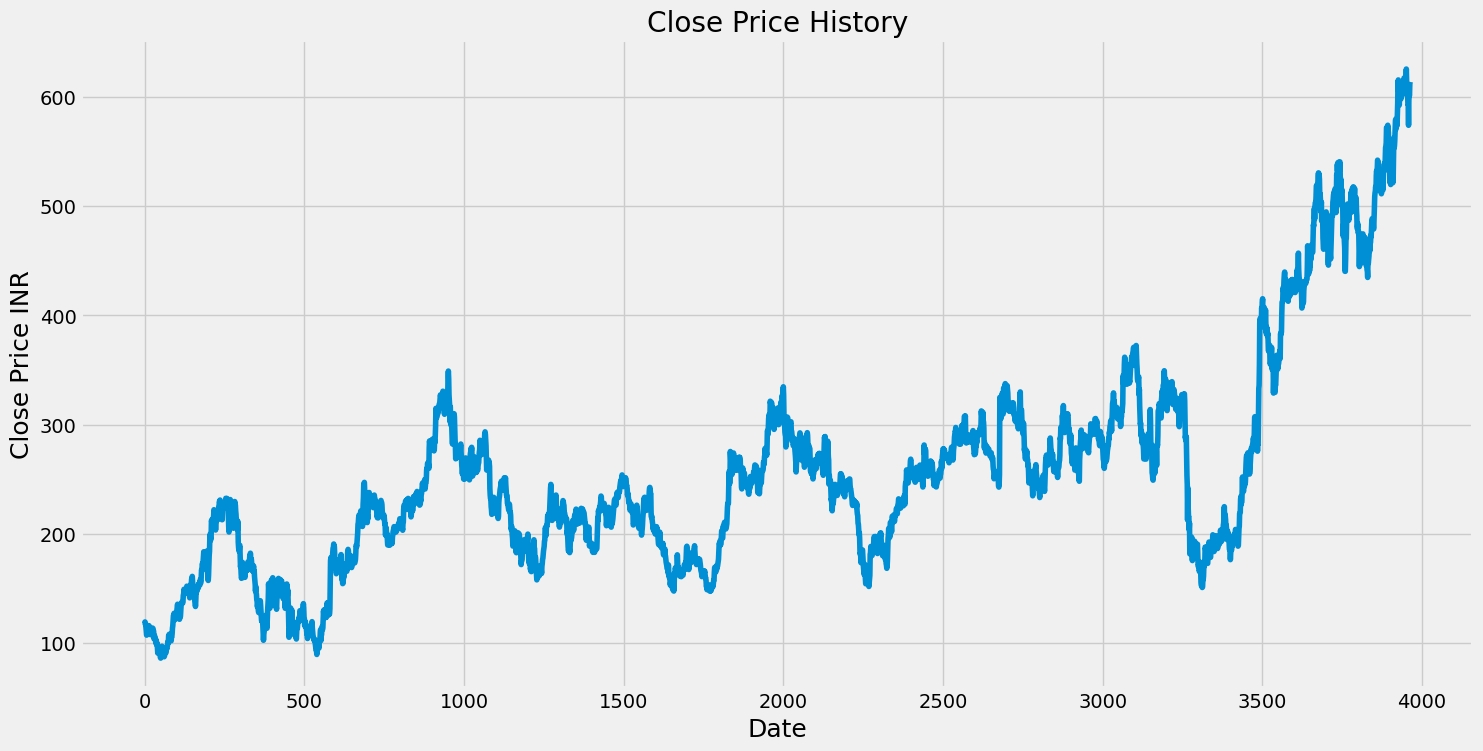

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Price'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [7]:
data=data.filter(['Price'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.05946487],
       [0.06144889],
       [0.05762919],
       ...,
       [0.95466429],
       [0.97459717],
       [0.97812019]])

In [8]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

#########################################
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()


[array([0.05946487, 0.06144889, 0.05762919, 0.05781461, 0.052493  ,
       0.04570655, 0.03897573, 0.04090412, 0.05455119, 0.05399492,
       0.05180694, 0.05405055, 0.05518162, 0.05364262, 0.05440285,
       0.04555821, 0.04529862, 0.04598468, 0.04242458, 0.03968033,
       0.05062024, 0.046782  , 0.04958187, 0.04948916, 0.04922957,
       0.05100962, 0.05004543, 0.04724555, 0.04544696, 0.03300514,
       0.03656524, 0.0382155 , 0.03396933, 0.03363557, 0.02875897,
       0.02529158, 0.03057611, 0.02720142, 0.02243608, 0.02484656,
       0.01596484, 0.0085665 , 0.01301663, 0.00888172, 0.01500065,
       0.01207098, 0.01060614, 0.01168159, 0.00602622, 0.00148338,
       0.        , 0.00226215, 0.00678645, 0.01212661, 0.02024809,
       0.01969183, 0.01750385, 0.01051343, 0.0126087 , 0.01414771])]
[0.0029482116037158612]



In [9]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(3112, 60)

In [10]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(3112, 60, 1)

In [11]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

3112/3112 [==============================] - 87s 27ms/step - loss: 6.0520e-04


In [14]:
model.save('keras_model.h5')

In [15]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [16]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [17]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

25/25 [==============================] - 2s 15ms/step


In [18]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

24.767122799820967

In [19]:
mean_absolute_percentage_error(y_test, predictions)

0.05234834053808787

C:\Users\yaman\AppData\Local\Temp\ipykernel_6508\823980526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


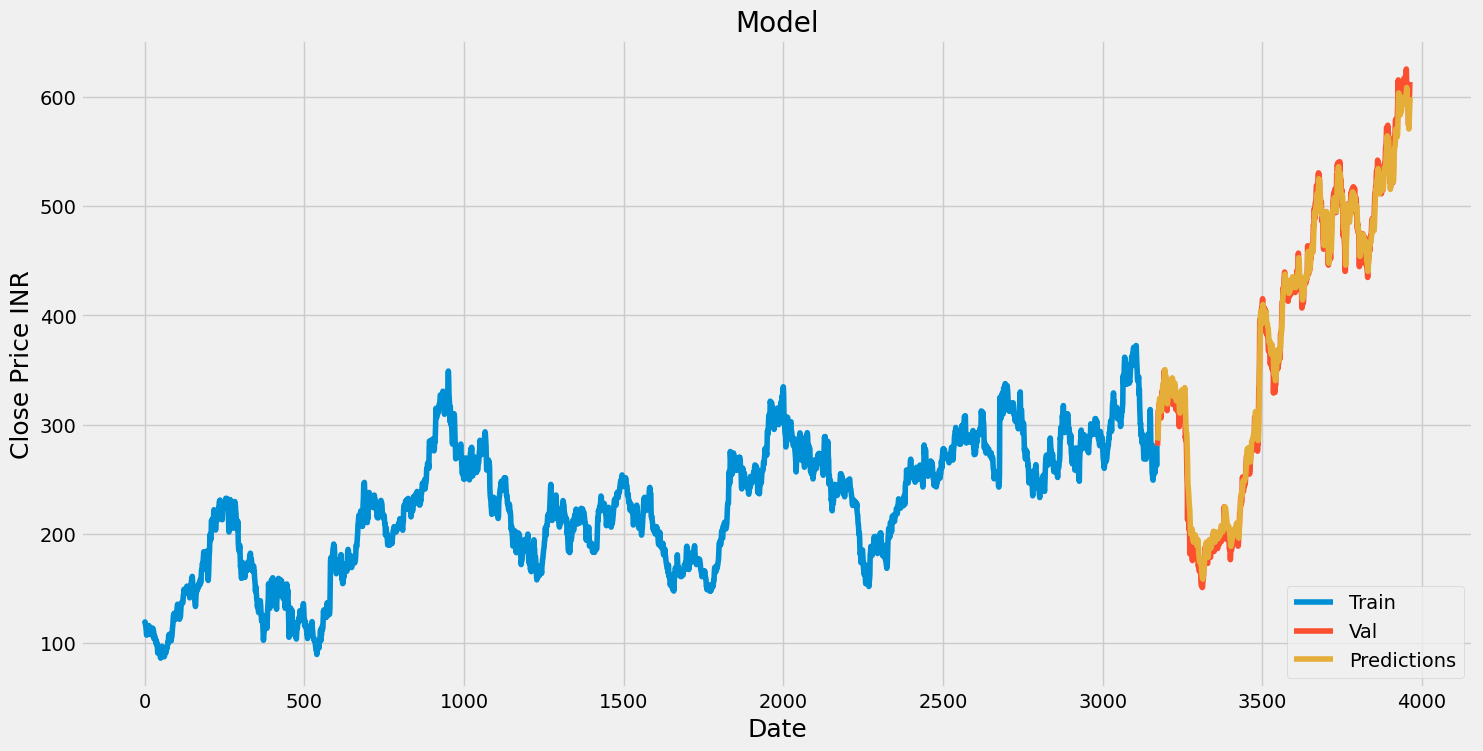

In [34]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [35]:
#show the valid and predicted prices
valid

,Price,Predictions
3172,280.65,285.393707
3173,289.90,287.360077
3174,312.40,291.682739
3175,313.55,304.078033
3176,314.30,314.159912
...,...,...
3959,597.10,570.590820
3960,601.90,576.104187
3961,601.05,585.599609
3962,611.80,591.649963
